In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('./data/training.json', 'r') as f:
    data = json.load(f)
    

In [3]:
df = pd.DataFrame(data)
df.head()

,text,stars
0,The hotel I was staying in recommended this pl...,1.0
1,The worst customer service~Spend 2 hours & 35 ...,1.0
2,I have an appointment and I see people coming ...,1.0
3,I usually really like Milestones but this one ...,1.0
4,First off I would like to say that my first ma...,1.0


In [11]:
print(df['text'][0])

The hotel I was staying in recommended this place. After an exauhsting day of moving I was very hungry and tired and pizza sounded great. I called and ordered just a pepperoni pizza. No big deal, right. I was told about 30-45 minutes. I waited for 90 minutes and still NO PIZZA! I called and like a previous post said, was put on hold for over 10 minutes. They finally came on the phone and simply stated the guy was on his way. Another 30 minutes and still no pizza. I went up to the lobby to see if there was another place I could call for some food as I was falling asleep waiting. As I was waiting to talk to the desk person the pizza guy walks in! Mind you this is over 2 hours after I ordered. He asks my name and hands me the receipt to sign and the pizza. The box didn't feel even warm, so I opened it and sure enough it was cold. I complained to him and he could have cared less. Needless to say, I didn't tip very much. I took my cold pizza back to my room and ate it cold as I was too tire

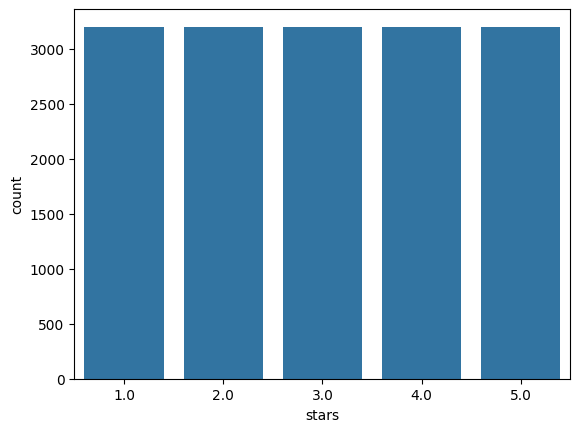

In [8]:
sns.countplot(data=df, x='stars');

In [12]:
df['length'] = df['text'].apply(len)
df['length'].describe()


count    16000.000000
mean       670.414500
std        612.377822
min         11.000000
25%        268.000000
50%        486.000000
75%        867.000000
max       4999.000000
Name: length, dtype: float64

In [13]:
df.head()

,text,stars,length
0,The hotel I was staying in recommended this pl...,1.0,1164
1,The worst customer service~Spend 2 hours & 35 ...,1.0,743
2,I have an appointment and I see people coming ...,1.0,303
3,I usually really like Milestones but this one ...,1.0,1323
4,First off I would like to say that my first ma...,1.0,803


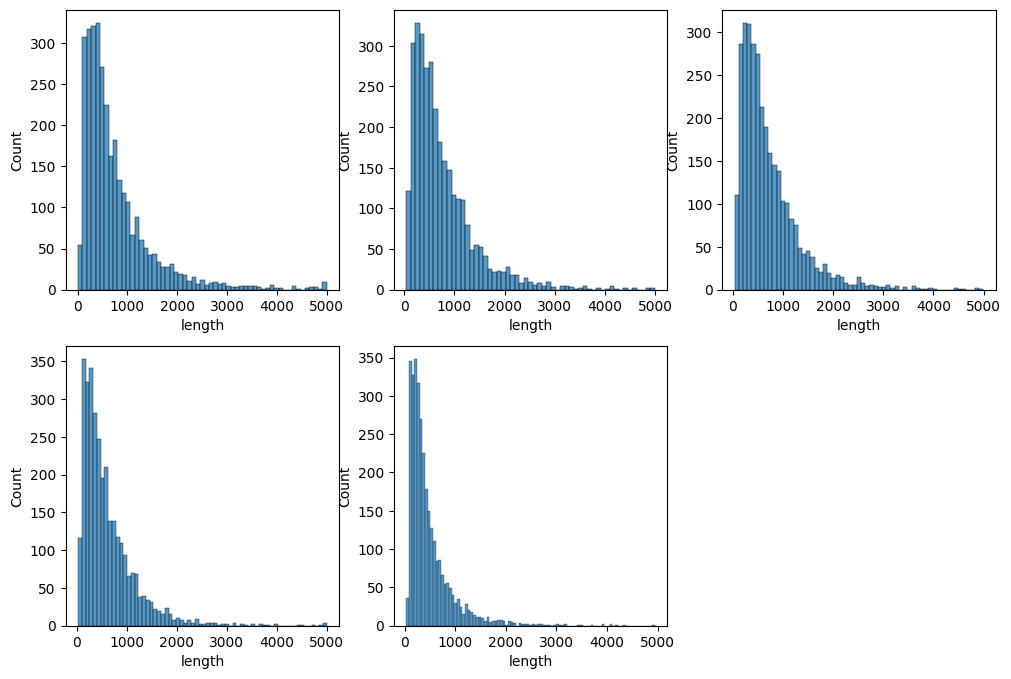

In [20]:
plt.figure(figsize=(12, 8))
for i in range(1, 6):
    plt.subplot(2, 3, i)
    sns.histplot(data=df[df['stars'] == i], x='length');
